In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data = pd.read_csv('./Datasets/cities_r2.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [42]:
X = data[['effective_literacy_rate_total']]
y = data['population_total']

In [43]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [44]:
from sklearn.cluster import KMeans

# Calculate SSE - Sum of squared Errors for no. of clusters
inertia = []

for k in range(1,11):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

inertia

[492.9999999999999,
 194.09785646249307,
 106.13437469098342,
 67.3986261719928,
 46.732387252488934,
 33.134808133473236,
 29.77102429525818,
 21.00688595133534,
 19.161447871244818,
 14.898829669109881]

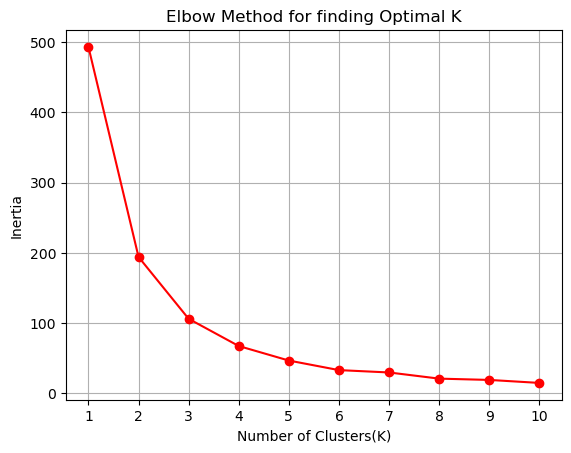

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), inertia, marker='o', color='r')
plt.title('Elbow Method for finding Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.grid()
plt.xticks(range(1,11))
plt.show()

In [46]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_scaled)

In [47]:
labels

array([0, 4, 2, 2, 3, 4, 3, 1, 4, 4, 1, 0, 4, 4, 4, 3, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 1, 1, 3, 4, 2, 0, 2, 2, 4, 1, 1, 1, 1, 4, 3, 1, 1, 4, 0,
       1, 1, 1, 2, 4, 4, 2, 1, 1, 1, 2, 4, 4, 0, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 4, 0, 1, 2, 4, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 4, 1, 4, 1, 1, 4, 0, 2, 0, 1, 2, 4, 2, 4, 0, 0, 2, 1,
       2, 1, 2, 4, 0, 1, 4, 2, 1, 4, 2, 4, 4, 3, 1, 2, 1, 0, 4, 1, 4, 0,
       2, 1, 2, 4, 2, 2, 2, 1, 2, 1, 4, 1, 2, 1, 1, 2, 3, 0, 4, 4, 1, 0,
       4, 4, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 3, 0, 1, 2, 4, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 4, 1, 2, 4, 1, 2, 2, 2, 0, 2, 1, 4, 1, 4, 0, 1,
       2, 1, 0, 4, 0, 1, 2, 4, 2, 0, 4, 0, 0, 4, 2, 1, 1, 2, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 4, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 1, 4, 2, 0, 4, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1,
       4, 2, 1, 3, 0, 0, 2, 4, 2, 4, 1, 4, 2, 2, 4, 4, 0, 4, 4, 0, 2, 2,
       1, 0, 2, 1, 2, 2, 4, 4, 4, 2, 4, 2, 1, 1, 3,

In [57]:
centroids = km.cluster_centers_
centroids

array([[-1.29626717],
       [ 0.34988242],
       [-0.37878231],
       [-2.88702584],
       [ 1.10880191]])

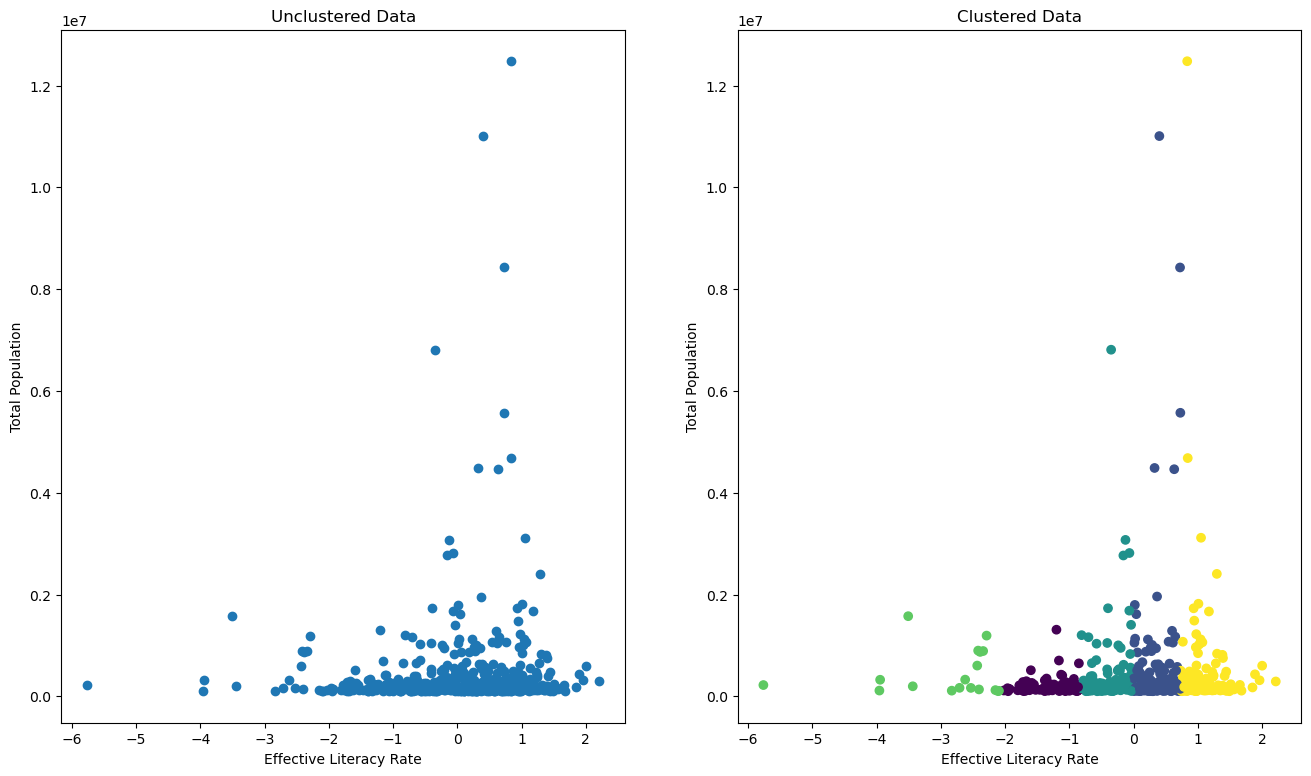

In [58]:
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
plt.title('Unclustered Data')
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Total Population')
plt.scatter(X_scaled, y)

plt.subplot(1, 2, 2)
plt.title('Clustered Data')
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Total Population')
plt.scatter(X_scaled, y, c=labels)